Chapter 9
# 自定义色谱
Book_2《可视之美》 | 鸢尾花书：从加减乘除到机器学习  

In [1]:
# 导入包
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib.colors import LinearSegmentedColormap
# matplotlib.colors.LinearSegmentedColormap() 可以用来产生连续色谱
# 函数输入为list；list 内可以是RGB/RGBA色号，也可以是色彩名称
# RGBA中的A是alpha (透明度)
# 参考
# https://matplotlib.org/stable/api/_as_gen/matplotlib.colors.LinearSegmentedColormap.html

import os

# 如果文件夹不存在，创建文件夹
if not os.path.isdir("Figures"):
    os.makedirs("Figures")

### 定义函数

In [2]:
# 函数内容来自上一话题

def visualize_cm_in_RGB(continuous_cmap, fig_name):

    color_codes = continuous_cmap(np.linspace(0, 1, 500))
    list_colors_RGB = [colors.to_rgb(rgb_idx) for rgb_idx in list_colors]

    fig = plt.figure(figsize = (6,6))

    azim_array = [38, 0, -90, -90]
    elev_array = [34, 0, 0,  90]

    for idx, angles in enumerate(zip(azim_array, elev_array)):

        ax = fig.add_subplot(2,2,idx+1, projection = '3d')

        ax.scatter(color_codes[:,0], 
                   color_codes[:,1], 
                   color_codes[:,2], 
                   c = color_codes, 
                   s = 4,
                   alpha = 1)

        for color_idx in list_colors_RGB:
            ax.plot(color_idx[0], color_idx[1], color_idx[2], 
                    marker = 'x',
                    markersize = 10, color = 'k')


        ax.set_xlim(0,1)
        ax.set_ylim(0,1)
        ax.set_zlim(0,1)
        ax.set_xticks([0, 1])
        ax.set_yticks([0, 1])
        ax.set_zticks([0, 1])
        ax.set_xlabel('R')
        ax.set_ylabel('G')
        ax.set_zlabel('B')

    #     # Transparent spines
    #     ax.w_xaxis.line.set_color((1.0, 1.0, 1.0, 0.0))
    #     ax.w_yaxis.line.set_color((1.0, 1.0, 1.0, 0.0))
    #     ax.w_zaxis.line.set_color((1.0, 1.0, 1.0, 0.0))

    #     # Transparent panes
    #     ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    #     ax.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    #     ax.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))


        # ax.grid()
        plt.rcParams['grid.color'] = "k"
        ax.set_proj_type('ortho')
        ax.set_box_aspect(aspect = (1,1,1))
        ax.view_init(azim=angles[0], elev=angles[1])

    fig.savefig('Figures/' + fig_name + '.svg', format='svg')


### 查看几个颜色名称RGB色号

In [57]:
print('darkblue = ')
print(colors.to_rgb('darkblue'))
print(colors.to_hex('darkblue'))

print('skyblue = ')
print(colors.to_rgb('skyblue'))
print(colors.to_hex('skyblue'))

print('white = ')
print(colors.to_rgb('white'))
print(colors.to_hex('white'))

print('pink = ')
print(colors.to_rgb('pink'))
print(colors.to_hex('pink'))

print('magenta = ')
print(colors.to_rgb('magenta'))
print(colors.to_hex('magenta'))

darkblue = 
(0.0, 0.0, 0.5450980392156862)
#00008b
skyblue = 
(0.5294117647058824, 0.807843137254902, 0.9215686274509803)
#87ceeb
white = 
(1.0, 1.0, 1.0)
#ffffff
pink = 
(1.0, 0.7529411764705882, 0.796078431372549)
#ffc0cb
magenta = 
(1.0, 0.0, 1.0)
#ff00ff


### 两个端点

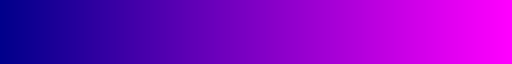

In [4]:
list_nodes  = [0.0, 1.0] 
# 自定义色谱
# 0， 1 为色谱的两个端点
list_colors = ['darkblue','magenta']
# 两个端点对应的色彩名称，也可以是 RGB/RGBA 色号

continuous_cmap_two_nodes = LinearSegmentedColormap.from_list("camp_name", list(zip(list_nodes, list_colors)))
continuous_cmap_two_nodes

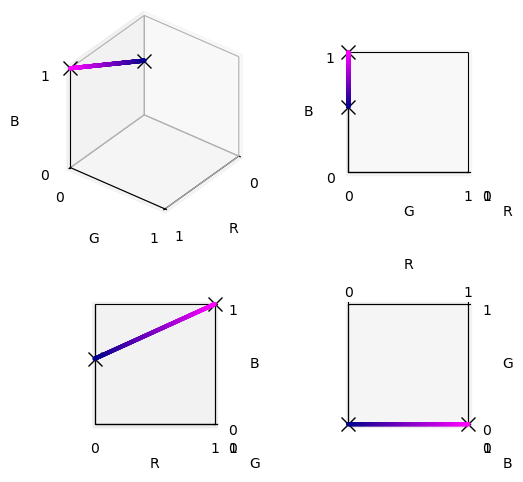

In [5]:
visualize_cm_in_RGB(continuous_cmap_two_nodes, 'darkblue_0_magenta_1')

### 三个节点，均匀

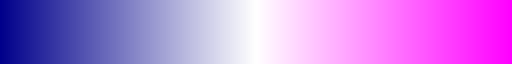

In [6]:
list_nodes  = [0.0, 0.5, 1.0] 
# 三个颜色，对应三个节点
list_colors = ['darkblue','white','magenta']
continuous_cmap_three_even_nodes = LinearSegmentedColormap.from_list("", list(zip(list_nodes, list_colors)))
continuous_cmap_three_even_nodes

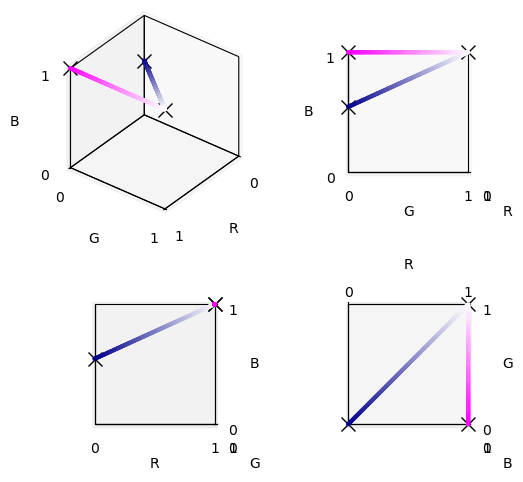

In [7]:
visualize_cm_in_RGB(continuous_cmap_three_even_nodes, 'darkblue_0_white_.5_magenta_1')

### 三个节点，不均匀

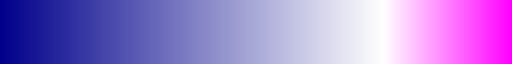

In [8]:
list_nodes  = [0.0, 0.75, 1.0] 
# 三个颜色，对应三个节点
list_colors = ['darkblue','white','magenta']
continuous_cmap_three_uneven_nodes = LinearSegmentedColormap.from_list("", list(zip(list_nodes, list_colors)))
continuous_cmap_three_uneven_nodes

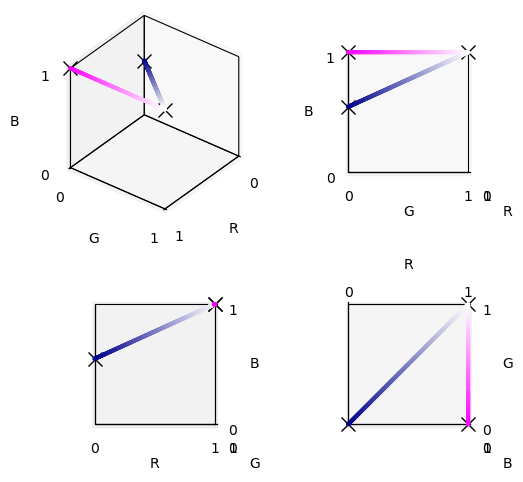

In [9]:
visualize_cm_in_RGB(continuous_cmap_three_uneven_nodes, 'darkblue_0_white_.75_magenta_1')

### 五个节点，均匀

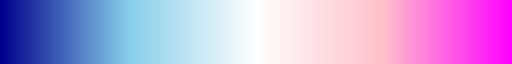

In [11]:
list_nodes  = [0.0, 0.25, 0.5, 0.75, 1.0] 
list_colors = ['darkblue','skyblue','white','pink','magenta']
continuous_cmap_five_even_nodes = LinearSegmentedColormap.from_list("Chinese_plum_blossom", list(zip(list_nodes, list_colors)))
continuous_cmap_five_even_nodes
# 给这个色谱取了个名字——梅花盛开

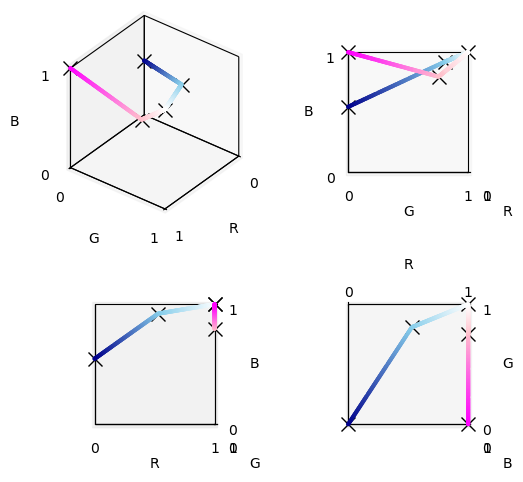

In [12]:
visualize_cm_in_RGB(continuous_cmap_five_even_nodes, 'Chinese_plum_blossom')

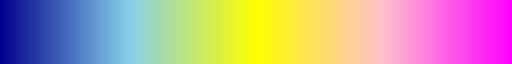

In [60]:
list_nodes  = [0.0, 0.25, 0.5, 0.75, 1.0] 
list_colors = ['darkblue','skyblue','yellow','pink','magenta']
continuous_cmap_five_even_nodes_mid_y = LinearSegmentedColormap.from_list("Chinese_plum_blossom_yl", list(zip(list_nodes, list_colors)))
continuous_cmap_five_even_nodes_mid_y

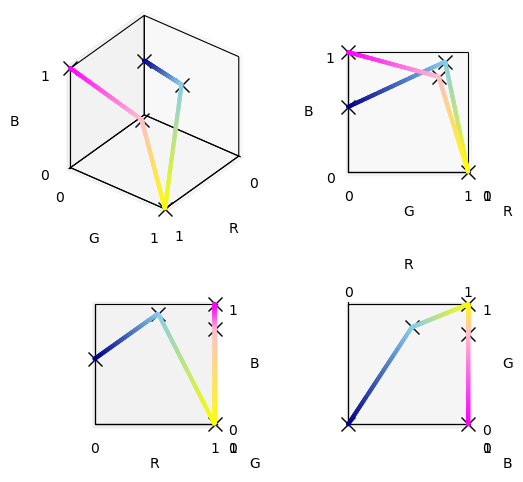

In [61]:
visualize_cm_in_RGB(continuous_cmap_five_even_nodes_mid_y, 'Chinese_plum_blossom_yl')

### 五个节点，不均匀

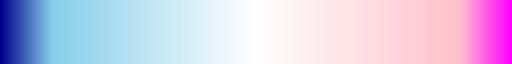

In [13]:
list_nodes  = [0.0, 0.1, 0.5, 0.9, 1.0] 
list_colors = ['darkblue','skyblue','white','pink','magenta']
continuous_cmap_five_uneven_nodes = LinearSegmentedColormap.from_list("Chinese_plum_blossom", list(zip(list_nodes, list_colors)))
continuous_cmap_five_uneven_nodes

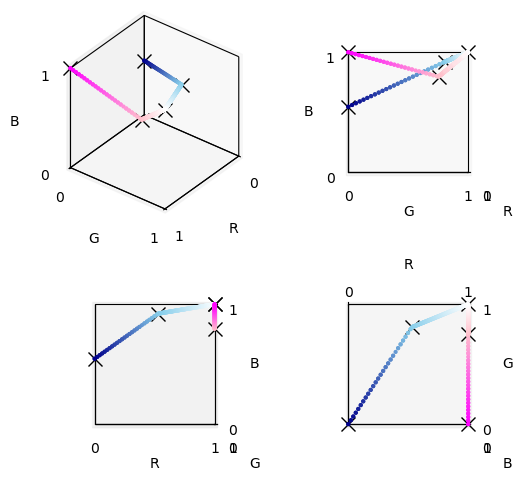

In [14]:
visualize_cm_in_RGB(continuous_cmap_five_uneven_nodes, 'five_nodes_uneven')

### RGB色谱，不循环

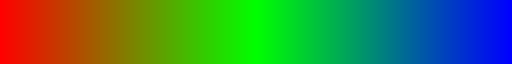

In [49]:
list_nodes  = [0.0, 1/2, 1.0] 
list_colors = ['r',[0, 1, 0],'b']
# 注意，'green' 或者 'g' 对应 [0, 0.5, 0]
# 圆心很简单 [0, 1, 0] 在 RGB 中过于鲜亮刺眼
# 请大家试着调转三个基色顺序，改变节点位置
RGB_cmap_3_nodes = LinearSegmentedColormap.from_list("", list(zip(list_nodes, list_colors)))
RGB_cmap_3_nodes


In [48]:
print('green = ')
print(colors.to_rgb('g'))
print(colors.to_hex('g'))

green = 
(0.0, 0.5, 0.0)
#008000


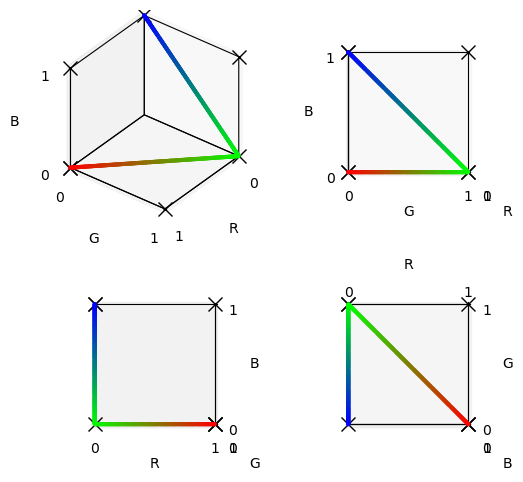

In [59]:
visualize_cm_in_RGB(RGB_cmap_3_nodes, 'RGB_cmap_3_nodes')

### RGB色谱，循环

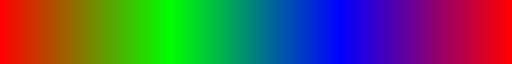

In [51]:
list_nodes  = [0.0, 1/3, 2/3, 1.0] 
list_colors = ['r',[0, 1, 0],'b', 'r']
# 注意，'green' 或者 'g' 对应 [0, 0.5, 0]
# 圆心很简单 [0, 1, 0] 在 RGB 中过于鲜亮刺眼
# 请大家试着调转三个基色顺序，改变节点位置
RGB_cmap_cyclic = LinearSegmentedColormap.from_list("", list(zip(list_nodes, list_colors)))
RGB_cmap_cyclic


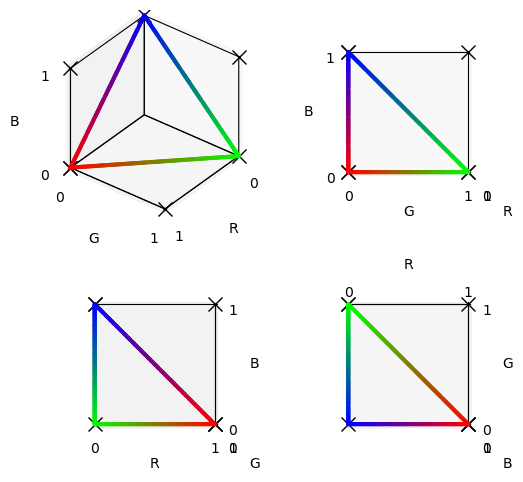

In [58]:
visualize_cm_in_RGB(RGB_cmap_cyclic, 'RGB_cmap_3_nodes_cyclic')

### CMY色谱，不循环

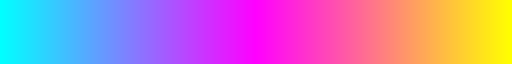

In [21]:
list_nodes  = [0.0, 1/2, 1.0] 
list_colors = ['cyan','magenta','yellow']
# 请大家试着调转三个基色顺序，改变节点位置
CMY_cmap_3_nodes = LinearSegmentedColormap.from_list("", list(zip(list_nodes, list_colors)))
CMY_cmap_3_nodes

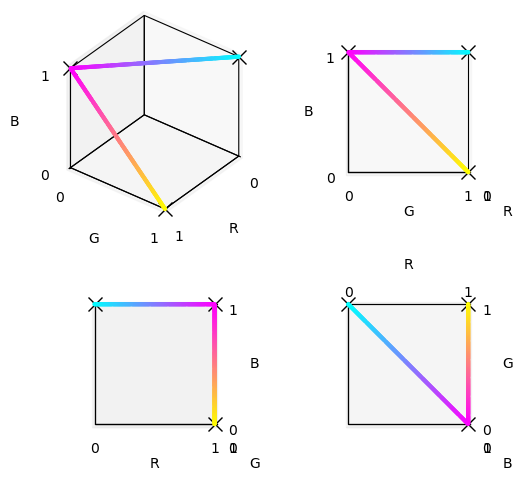

In [18]:
visualize_cm_in_RGB(CMY_cmap_3_nodes, 'CMY_cmap_3_nodes')

### CMY色谱，循环

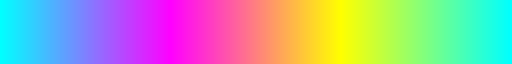

In [19]:
list_nodes  = [0.0, 1/3, 2/3, 1.0] 
list_colors = ['cyan','magenta','yellow', 'cyan']
# 用CMY基色构造色谱，循环cyclic
CMY_cmap_cyclic = LinearSegmentedColormap.from_list("", list(zip(list_nodes, list_colors)))
CMY_cmap_cyclic

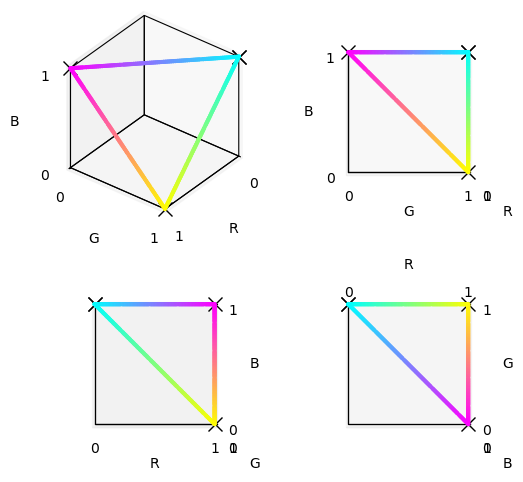

In [20]:
visualize_cm_in_RGB(CMY_cmap_cyclic, 'CMY_cmap_cyclic')

### 仿制HSV色谱

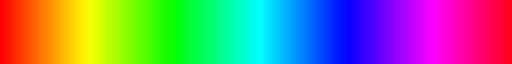

In [54]:
import matplotlib as mpl
mpl.colormaps['hsv'] 
# Matplotlib中的hsv色谱

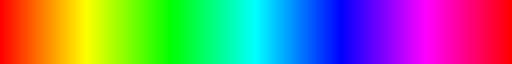

In [55]:
list_nodes  = [0.0, 1/6, 2/6, 3/6, 4/6, 5/6, 1.0] 
list_colors = ['red','yellow', [0, 1, 0], 'cyan', 'blue', 'magenta','red']
# 仿制hsv色谱
HSV_cmap_cyclic = LinearSegmentedColormap.from_list("", list(zip(list_nodes, list_colors)))
HSV_cmap_cyclic

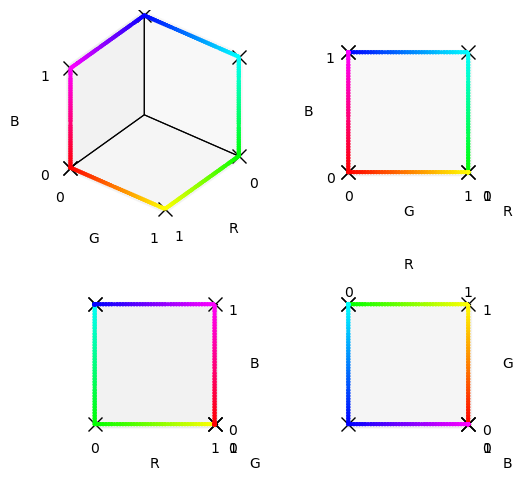

In [56]:
visualize_cm_in_RGB(HSV_cmap_cyclic, 'HSV_cmap_cyclic')

In [ ]:
# Repo: https://github.com/Visualize-ML
# Book 2 Beauty of Visualization  |  From Basic Arithmetic to Machine Learning
# Published and copyrighted by Tsinghua University Press
# Beijing, China, 2023